# Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2,norm
from scipy.stats import chi2_contingency

# Data Description :
* The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). 
* The study is primarily limited only to students with engineering disciplines.
* The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills,technical skills and personality skills.
* The dataset also contains demographic features. 
* The dataset contains around 40 independent variables and 4000 data points.
* The independent variables are both continuous and categorical in nature.
* The dataset contains a unique identifier for each candidate.  

# Objective:
* To perform Univariate and bivariate analysis. 
* To find the outliers in each column. 
* To Understand the probability and frequency distribution of numeric and categorical columns.
* To identify the patterns between categorical variables using various plots.

In [3]:
#importing required dataset using pandas
df = pd.read_csv("aspiring_minds_employability_outcomes_2015.csv")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,01-06-2012 00:00,present,senior quality engineer,Bangalore,f,19-02-1990 00:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,01-09-2013 00:00,present,assistant manager,Indore,m,04-10-1989 00:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,01-06-2014 00:00,present,systems engineer,Chennai,f,03-08-1992 00:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,01-07-2011 00:00,present,senior software engineer,Gurgaon,m,05-12-1989 00:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,01-03-2014 00:00,01-03-2015 00:00,get,Manesar,m,27-02-1991 00:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.tail()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3993,train,47916,280000.0,01-10-2011 00:00,01-10-2012 00:00,software engineer,New Delhi,m,15-04-1987 00:00,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000.0,01-07-2013 00:00,01-07-2013 00:00,technical writer,Hyderabad,f,27-08-1992 00:00,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000.0,01-07-2013 00:00,present,associate software engineer,Bangalore,m,03-07-1991 00:00,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000.0,01-07-2014 00:00,01-01-2015 00:00,software developer,Asifabadbanglore,f,20-03-1992 00:00,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,train,324966,400000.0,01-02-2013 00:00,present,senior systems engineer,Chennai,f,26-02-1991 00:00,70.60,...,-1,-1,-1,-1,-1,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


In [5]:
df.shape

(3998, 39)

In [6]:
df.describe(include='all')

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998,3.998000e+03,3.998000e+03,3998,3998,3998,3998,3998,3998,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
unique,1,NaN,NaN,81,67,419,339,2,1872,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train,NaN,NaN,01-07-2014 00:00,present,software engineer,Bangalore,m,01-01-1991 00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3998,NaN,NaN,199,1875,539,627,3041,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.637945e+05,3.076998e+05,NaN,NaN,NaN,NaN,NaN,NaN,77.925443,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,NaN,3.632182e+05,2.127375e+05,NaN,NaN,NaN,NaN,NaN,NaN,9.850162,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,NaN,1.124400e+04,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,NaN,3.342842e+05,1.800000e+05,NaN,NaN,NaN,NaN,NaN,NaN,71.680000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,NaN,6.396000e+05,3.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN,79.150000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,NaN,9.904800e+05,3.700000e+05,NaN,NaN,NaN,NaN,NaN,NaN,85.670000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400


In [7]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [9]:
df['GraduationYear'].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

In [10]:
df['DOB']=pd.to_datetime(df['DOB'])
df['Dyear']=df['DOB'].dt.year
df.drop(columns=['DOB'],axis=1,inplace=True)

In [11]:
df['Dyear'].value_counts()

1991    979
1992    855
1990    774
1989    522
1988    308
1993    299
1987    116
1986     62
1994     31
1985     28
1984     13
1983      4
1982      2
1995      2
1981      1
1977      1
1997      1
Name: Dyear, dtype: int64

In [12]:
df['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
information science engineering                 27
electronics and instrumentation engineering     27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [13]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [14]:
df['Designation'].value_counts()

software engineer               539
software developer              265
system engineer                 205
programmer analyst              139
systems engineer                118
                               ... 
risk investigator                 1
sales manager                     1
recruiter                         1
digital marketing specialist      1
assistant administrator           1
Name: Designation, Length: 419, dtype: int64

In [15]:
df['CollegeState'].value_counts()

Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Union Territory        5
Assam                  5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

In [16]:
df['JobCity'].value_counts()

Bangalore              627
-1                     461
Noida                  368
Hyderabad              335
Pune                   290
                      ... 
kudankulam ,tarapur      1
Bhopal                   1
haryana                  1
BANGALORE                1
MUMBAI                   1
Name: JobCity, Length: 339, dtype: int64

# Univariate analysis:


<AxesSubplot:xlabel='Gender', ylabel='count'>

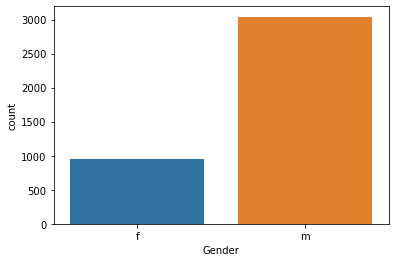

In [17]:
#countplot
sns.countplot(df['Gender'])

<AxesSubplot:>

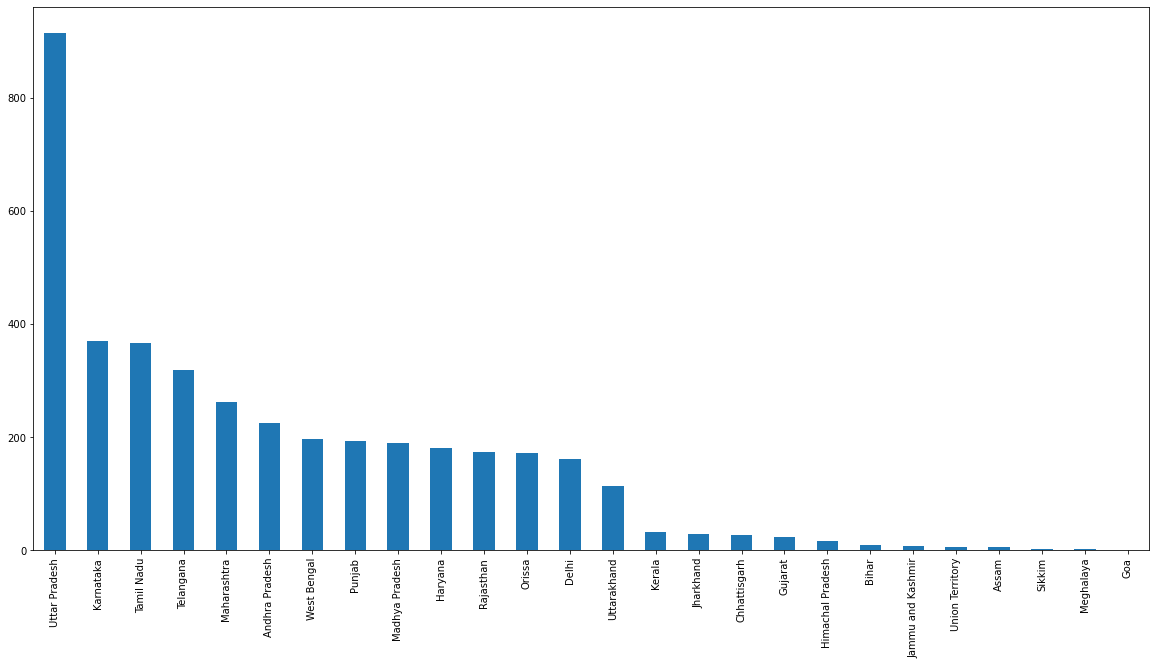

In [18]:
#Barplot
city = df['CollegeState'].value_counts()
city.plot(kind="bar",figsize=(20,10))

<AxesSubplot:>

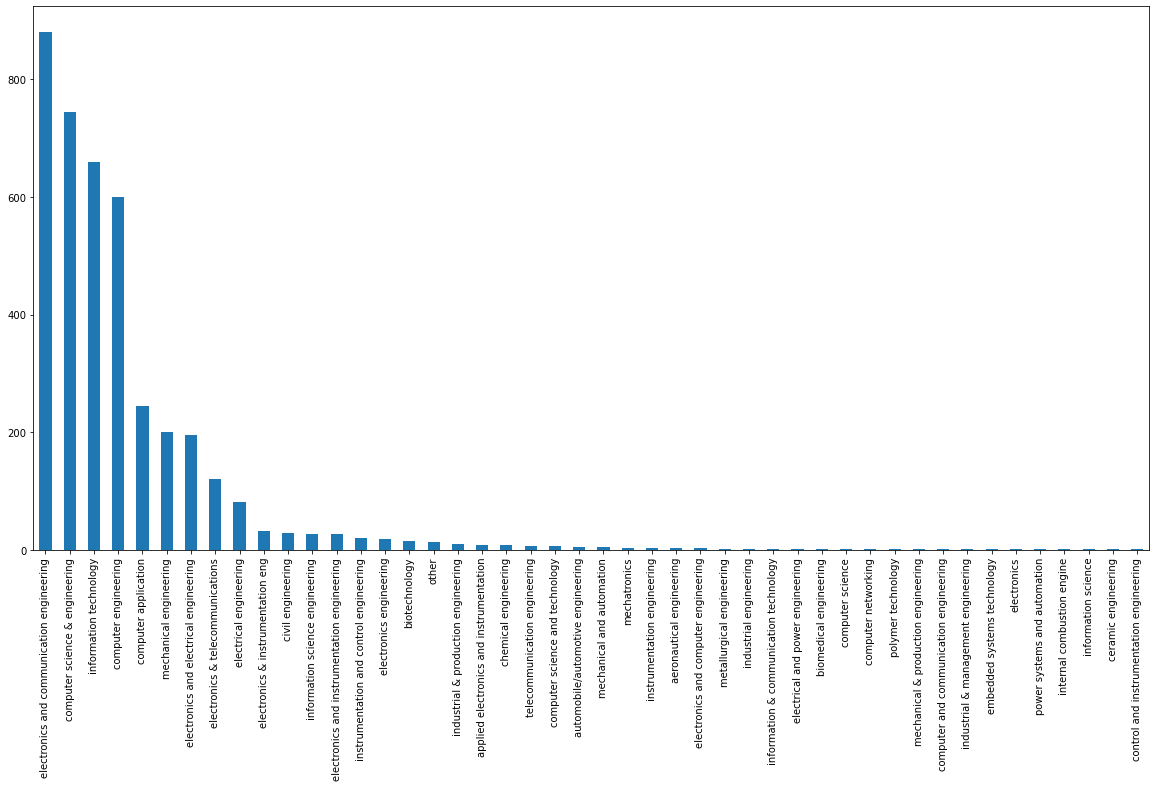

In [19]:
spec = df['Specialization'].value_counts()
spec.plot(kind="bar",figsize=(20,10))

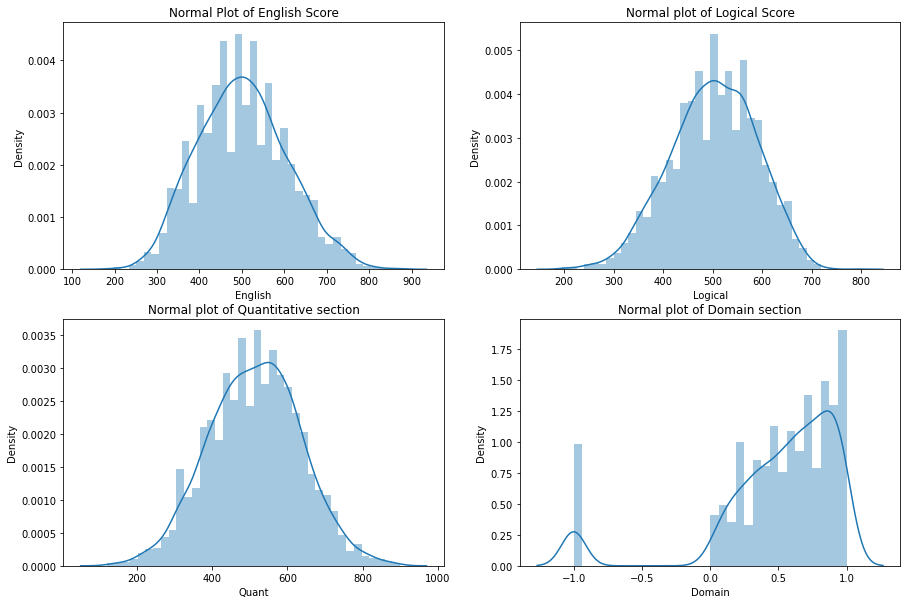

In [20]:
#Analysis of AMCAT scores- subplot of soft skill section
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.distplot(df['English'])
plt.title("Normal Plot of English Score")
plt.subplot(222)
sns.distplot(df['Logical'])
plt.title("Normal plot of Logical Score")
plt.subplot(223)
sns.distplot(df['Quant'])
plt.title("Normal plot of Quantitative section")
plt.subplot(224)
sns.distplot(df['Domain'])
plt.title("Normal plot of Domain section")
plt.show()

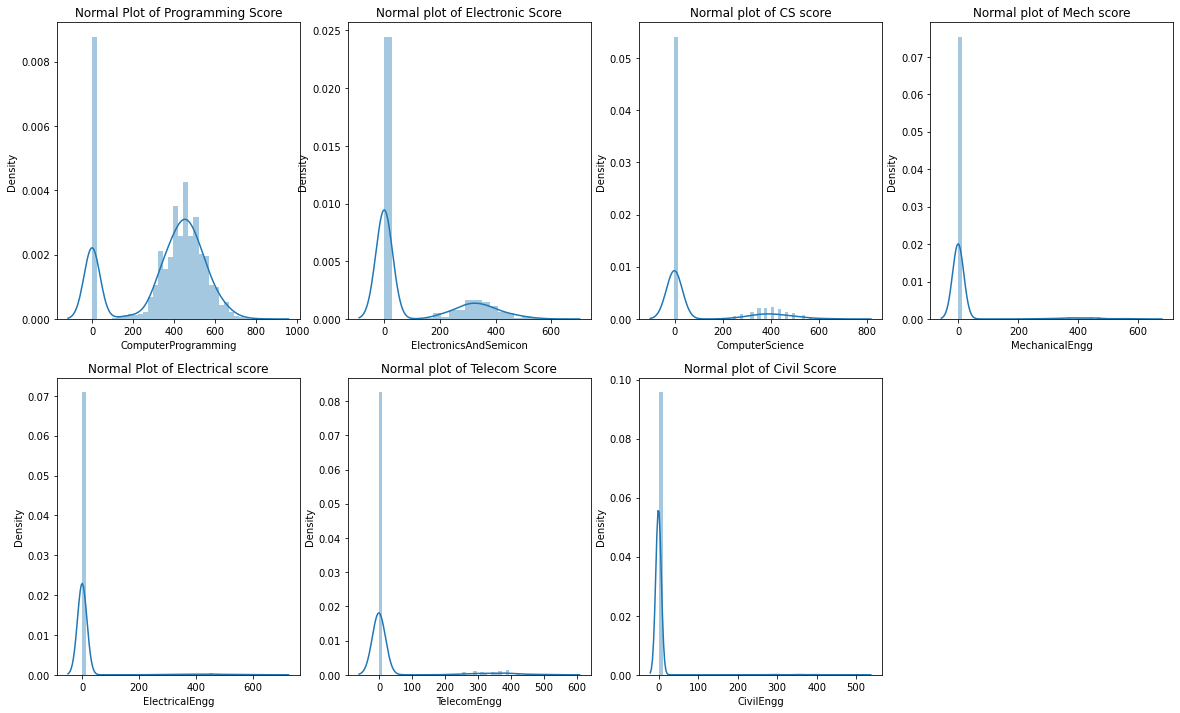

In [21]:
#Analysis of AMCAT scores - subplot of Hardskill section
plt.figure(figsize=(20,12))
plt.subplot(241)
sns.distplot(df['ComputerProgramming'])
plt.title("Normal Plot of Programming Score")
plt.subplot(242)
sns.distplot(df['ElectronicsAndSemicon'])
plt.title("Normal plot of Electronic Score")
plt.subplot(243)
sns.distplot(df['ComputerScience'])
plt.title("Normal plot of CS score")
plt.subplot(244)
sns.distplot(df['MechanicalEngg'])
plt.title("Normal plot of Mech score")
plt.subplot(245)
sns.distplot(df['ElectricalEngg'])
plt.title("Normal Plot of Electrical score")
plt.subplot(246)
sns.distplot(df['TelecomEngg'])
plt.title("Normal plot of Telecom Score")
plt.subplot(247)
sns.distplot(df['CivilEngg'])
plt.title("Normal plot of Civil Score")
plt.show()

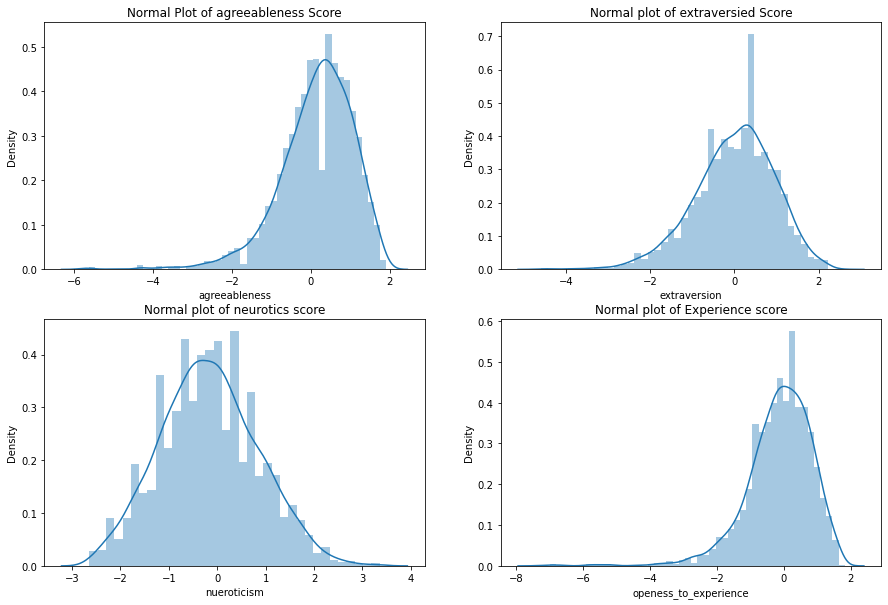

In [22]:
#Analysis of personality test using subplot
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.distplot(df['agreeableness'])
plt.title("Normal Plot of agreeableness Score")
plt.subplot(222)
sns.distplot(df['extraversion'])
plt.title("Normal plot of extraversied Score")
plt.subplot(223)
sns.distplot(df['nueroticism'])
plt.title("Normal plot of neurotics score")
plt.subplot(224)
sns.distplot(df['openess_to_experience'])
plt.title("Normal plot of Experience score")
plt.show()

<AxesSubplot:ylabel='Dyear'>

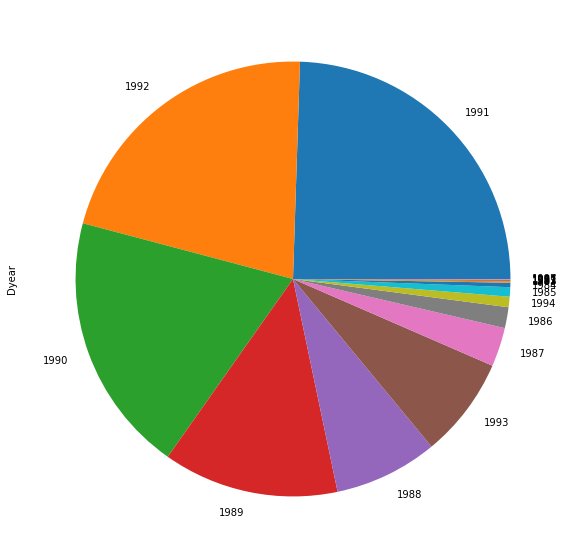

In [23]:
#Year wise analysis
birth = df['Dyear'].value_counts()
birth.plot(kind="pie",figsize=(20,10))

<AxesSubplot:>

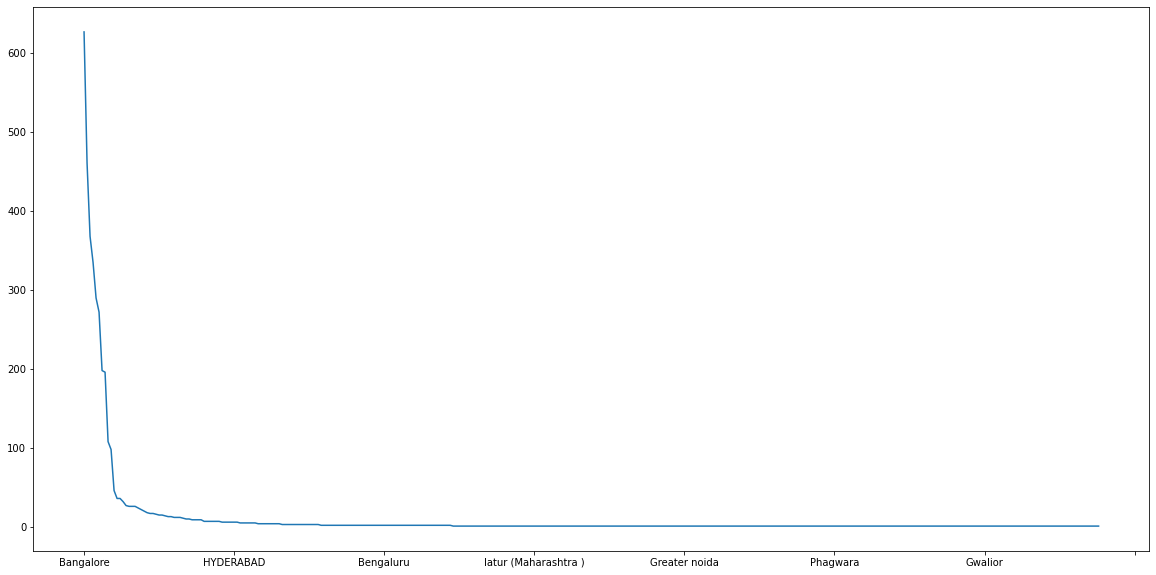

In [24]:
job_c = df['JobCity'].value_counts()
job_c.plot(kind="line",figsize=(20,10))

<AxesSubplot:ylabel='Frequency'>

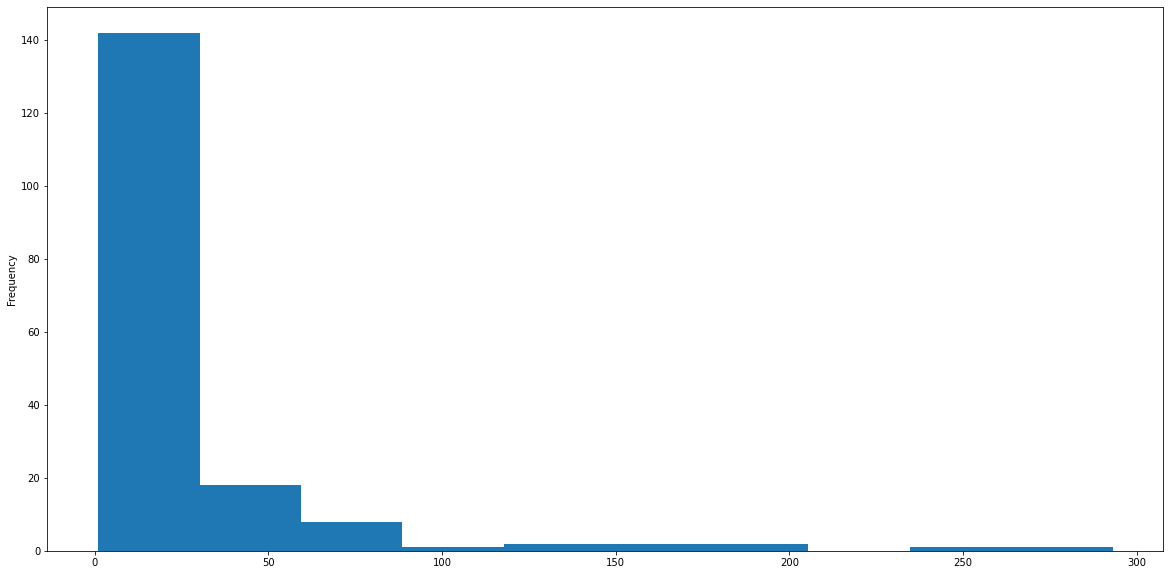

In [25]:
#Plotting of Salary
sal = df['Salary'].value_counts()
sal.plot(kind="hist",figsize=(20,10))

In [26]:
#Taking the year
df['DOJ']=pd.to_datetime(df['DOJ'])
df['Djoin']=df['DOJ'].dt.year
df.drop(columns=['DOJ'],axis=1,inplace=True)

In [27]:
df['Djoin'].value_counts()

2014    1596
2013    1004
2012     590
2011     381
2015     248
2010     166
2009       5
2007       4
2004       1
2006       1
2008       1
1991       1
Name: Djoin, dtype: int64

<AxesSubplot:ylabel='Frequency'>

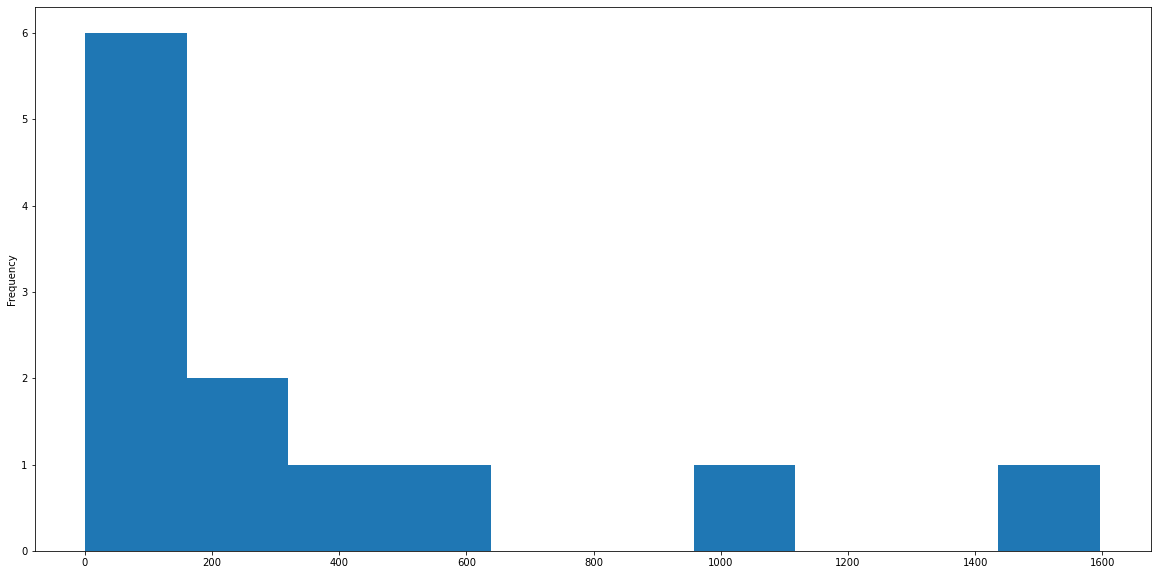

In [28]:
sal = df['Djoin'].value_counts()
sal.plot(kind="hist",figsize=(20,10))

# Observations from Univariate analysis:
1. Male candidates are preferred than female candidates.
2. More number of students from North india are choosen for the job roles.
3. Most students are from electronic background.
4. AMCAT scores of soft skills are normally distributed.
5. AMCAT scores of hard skills follows log normal distribution we can transform it to normal by box-cox transformation.
6. AMCAT scores of personality test follows normal distribution with positive skewness.
7. Candidates born on the year 1991 and 1992 more likely to crack the interview.
8. After getting selected for the job role, Candidates most likely to choose Banglore as their job city.
9. Salary for freshers is 55k to 2 lakhs.
10. Job experince more than 2 years earn a salary above 2lakhs.
11. In the year 2014 more number of candidates have joined the company.

# Bivariate analysis

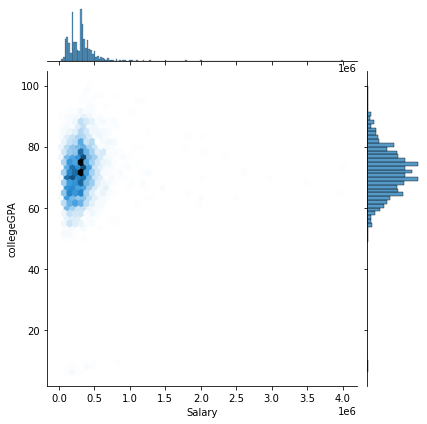

In [29]:
#hexbin plot to find relationship between salary and GPA
sns.jointplot(x=df['Salary'],y=df['collegeGPA'],data=df,kind="hex")

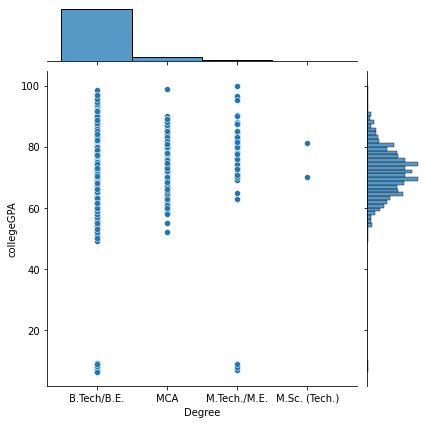

In [30]:
#Scatter plot for GPA vs Degree
sns.jointplot(x=df['Degree'],y=df['collegeGPA'],data=df,kind="scatter")

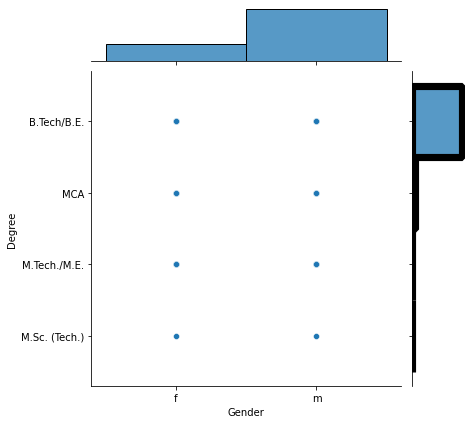

In [31]:
#Degree and gender
sns.jointplot(y=df['Degree'],x=df['Gender'],data=df)

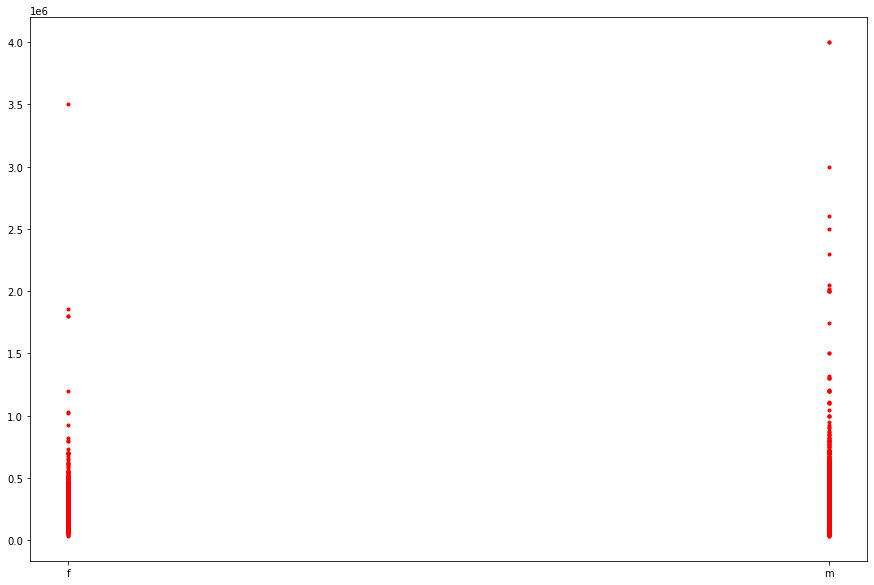

In [32]:
#Specification of gender and salary.
plt.figure(figsize=(15, 10))
plt.plot(df['Gender'],df['Salary'],'r.')
plt.show()

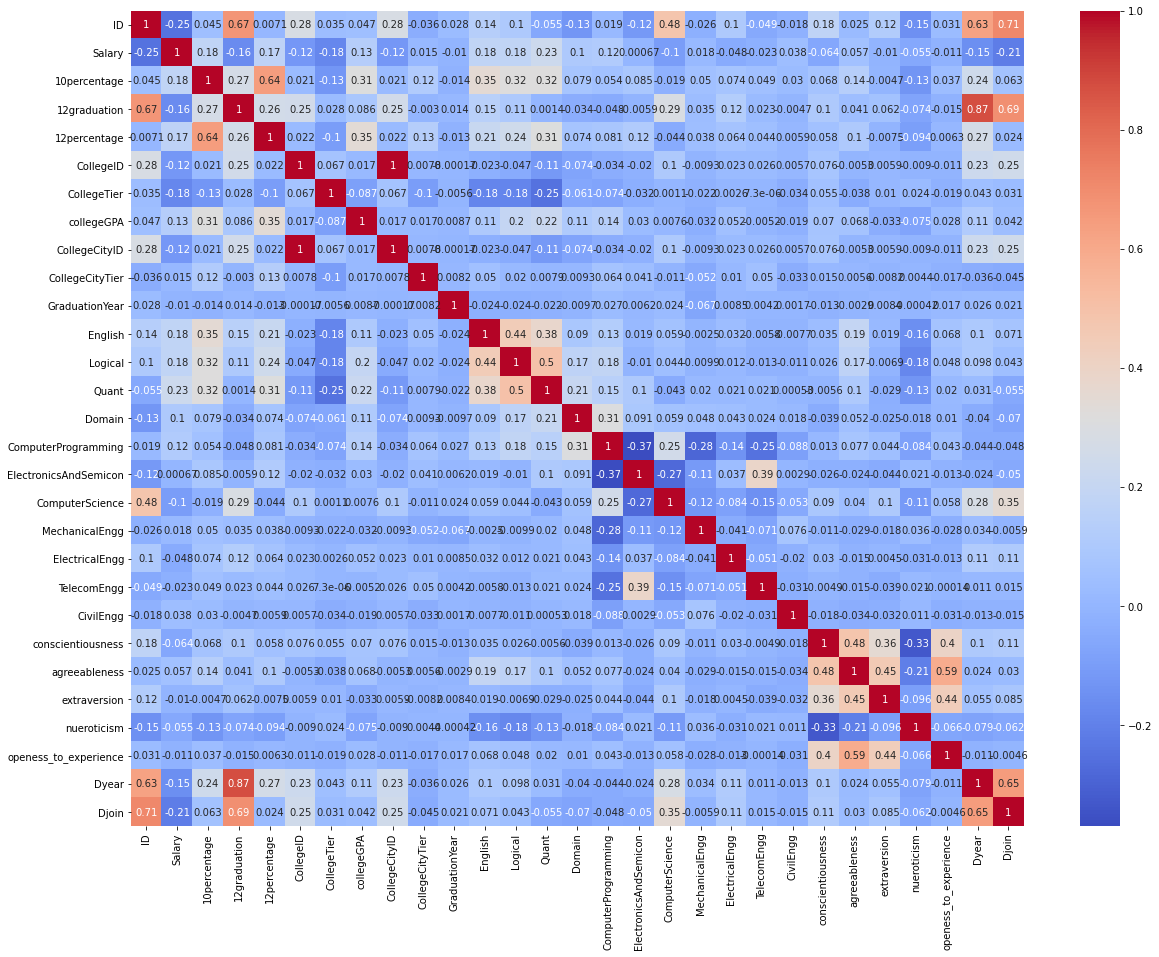

In [33]:
#Correlation between variables
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

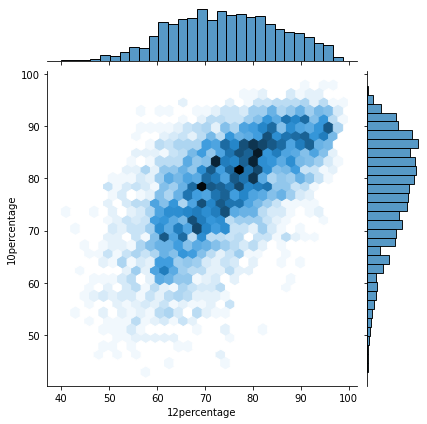

In [34]:
#Hexbin for school grades.
sns.jointplot(x=df['12percentage'],y=df['10percentage'],kind='hex',data=df)

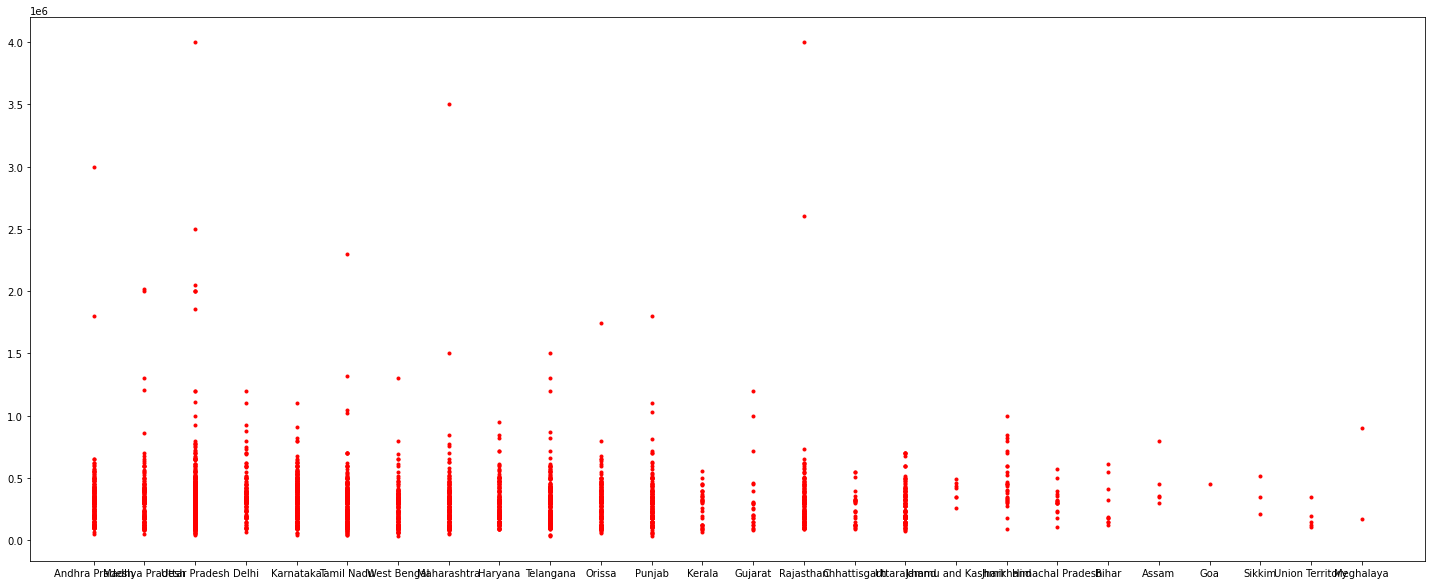

In [35]:
plt.figure(figsize=(25,10))
plt.plot(df['CollegeState'], df['Salary'], 'r.')
plt.show()

<Figure size 432x288 with 0 Axes>

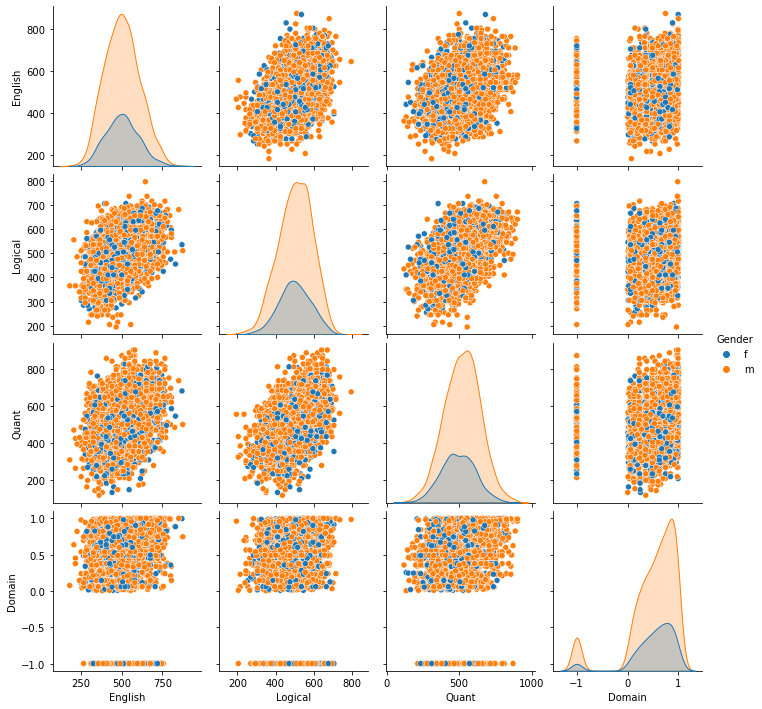

In [36]:
#Pairplot for Softskill score.
plt.figure()
cols_to_plot = df.columns[21:25].tolist() + ['Gender'] 
sns.pairplot(df[cols_to_plot], hue ="Gender" )
plt.show()

<Figure size 432x288 with 0 Axes>

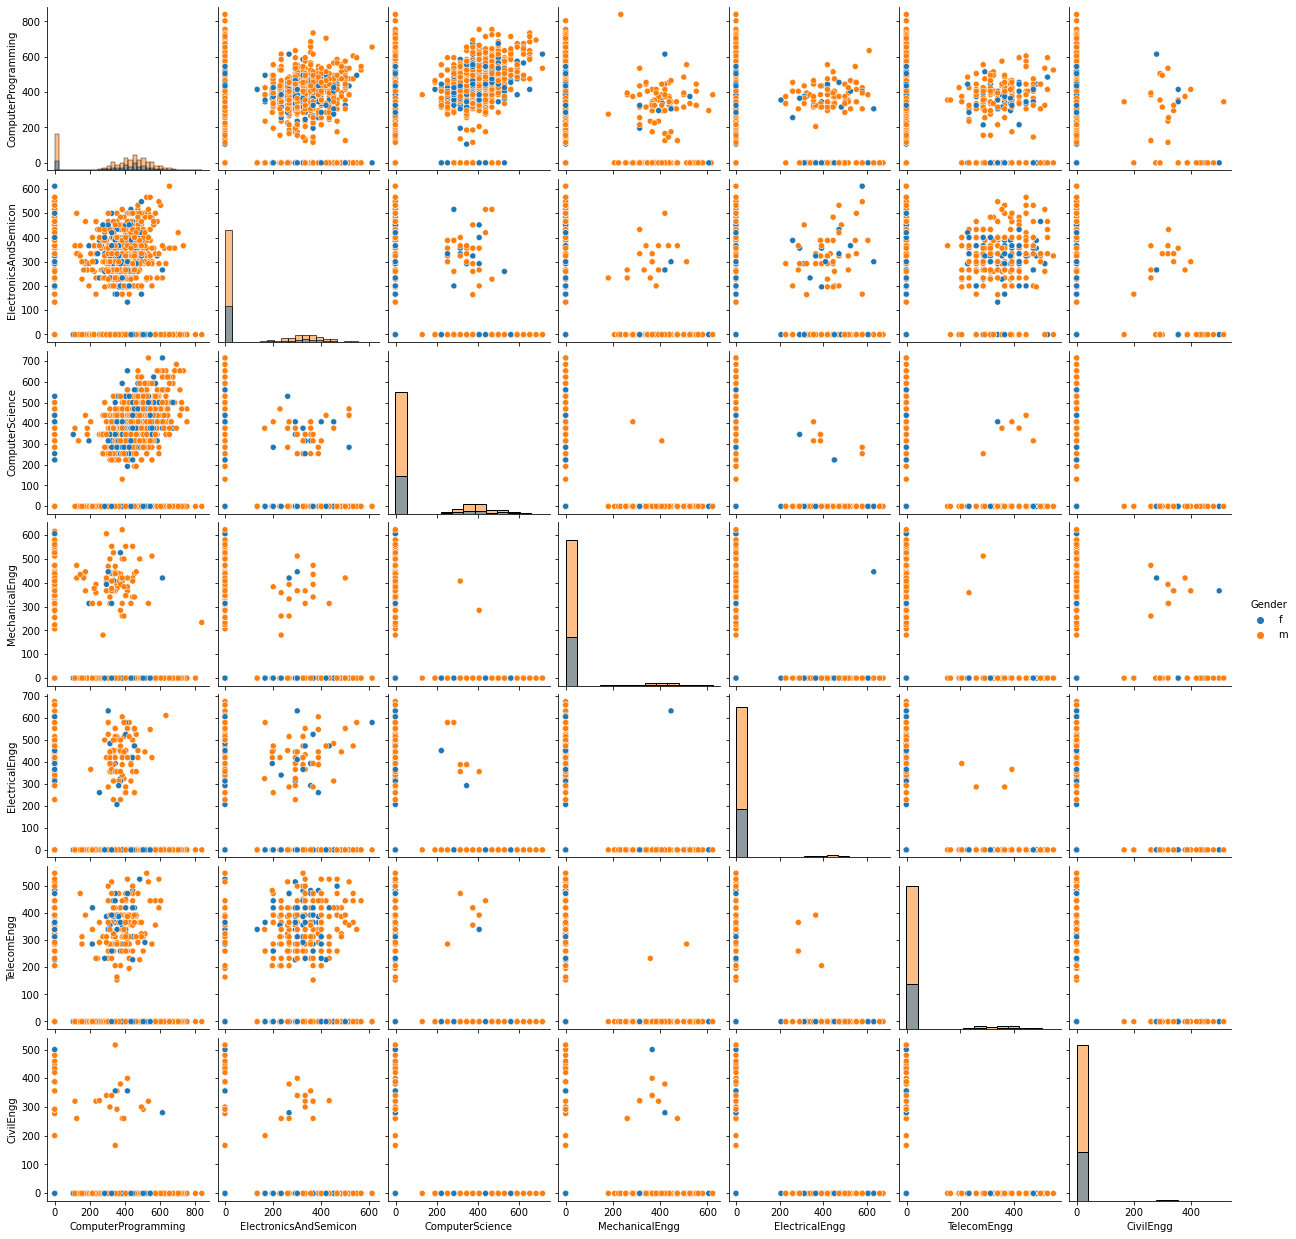

In [37]:
#pairplot for hardskills
plt.figure()
cols_to_plot = df.columns[25:32].tolist() + ['Gender'] 
sns.pairplot(df[cols_to_plot], hue ="Gender",diag_kind='hist' )
plt.show()

<Figure size 432x288 with 0 Axes>

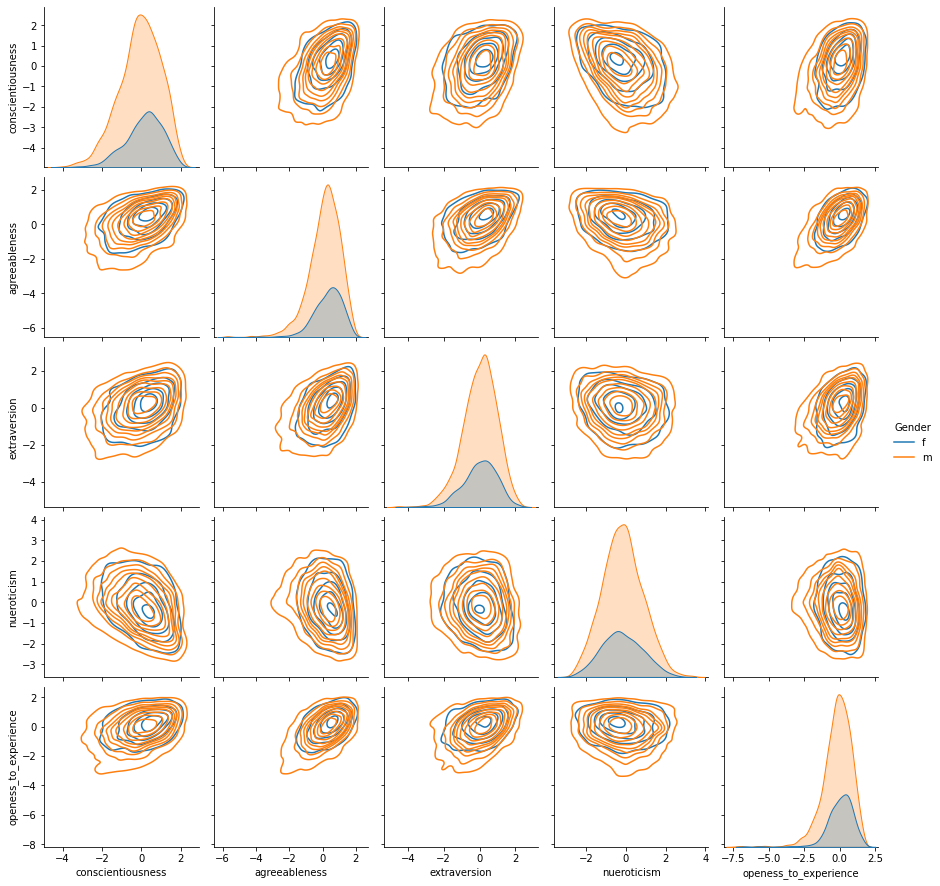

In [38]:
#pairplot for personality test
plt.figure()
cols_to_plot = df.columns[32:37].tolist() + ['Gender'] 
sns.pairplot(df[cols_to_plot], hue ="Gender",kind='kde' )
plt.show()

# Observations from Bivariate analysis:
1. Salary does not depends on the GPA scored by an student.
2. Most of the B.tech candidates are hired with an average of 70%.
3. Most of the Engineers are male compared to female.
4. Salary seems to be independent of gender, except few high packages for males.
5. The correlation heat map gives a detailed correation between numerical columns.
6. More number of candidates scored 70% in both 12th and 10th grade.
7. Jharkhand and Assam has unusually higher mean salaries compared to others.
8. In the soft skill section female candidates have a higher success rate than male.
9. In the hard skill section male candidates more likely to score more marks.
10. In the personality section both gender candidates have performed well.

# Research question:
**Ques-1: Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)**

 # Chi-Squared test:
   **Let us make a bold claim that gender and specialisation are dependent**<br>
   Step-1:<br>
   Alternate hypothesis:
    $$\ H1 = They\ are\ dependent$$
   Null hypothesis:
    $$\ H0= They\ are\ independent$$

Step - 2:

* Collect the sample of size n
* Compute the sample frequencies

Step-3: compute $\chi^2$ test statistic <br>
  Now we have to check whether the observed and expected frequencies are too extreme to reject null hypothesis.
  * Have a look at the observed frequencies(in the sample)
  * Compute the expected frequency.
  $$\ ExpectedValue = \frac{row\ total * column\ total}{grand\ total}$$
  Now test stastic can be computed using the below mentioned formula:
  $$\chi^2 = \sum {\frac{\ (o-e)^2}{e}}$$

Step - 4:<br> Decide $\alpha$ and df = (rows-1) (cols-1)

Step-5:<br>
* Chi squared test
$$if\ \chi^2 > \chi^2_{\alpha,df}, \ then \ Reject H0$$ 

* p-value test
$$\  pvalue = \ (1.0-(cdf(test statistic)) $$
* Now,
$$\ if(pvalue<\alpha), then\ reject\ H0\ or\ accept\ H1$$

In [39]:
#Frequency distribution
pd.crosstab(df['Specialization'],df['Gender'],margins = True)

Gender,f,m,All
Specialization,,,
aeronautical engineering,1,2,3
applied electronics and instrumentation,2,7,9
automobile/automotive engineering,0,5,5
biomedical engineering,2,0,2
biotechnology,9,6,15
ceramic engineering,0,1,1
chemical engineering,1,8,9
civil engineering,6,23,29
computer and communication engineering,0,1,1


In [40]:
#observed frequencies
observed=pd.crosstab(df['Specialization'],df['Gender'])

In [41]:
#Chi2 contingency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies
chi2_contingency(observed)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

In [42]:
chi2_test_statistic = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df1 = chi2_contingency(observed)[2]

In [43]:
#Calculating chi critical
confidence_level =0.90
alpha = 1 - confidence_level
chi2_critical = chi2.ppf(1-alpha,df1)
chi2_critical

57.50530474499599

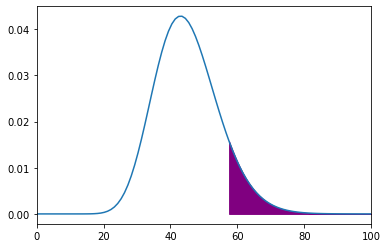

In [44]:
#Plotting the chi2 distribution
x_min = 0
x_max = 100

#plotting the graph and setting the limits
x = np.linspace(x_min,x_max,100)
y = chi2.pdf(x,df1)
plt.xlim(x_min,x_max)
plt.plot(x,y)

#Setting chi critical value
chi_critical_right = chi2_critical

#Shading the rejection region
x1 = np.linspace(chi_critical_right,x_max,100)
y1 = chi2.pdf(x1,df1)
plt.fill_between(x1,y1,color='purple')

In [45]:
#conclusion with chi2 test
if(chi2_test_statistic>chi2_critical):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Reject null hypothesis


In [46]:
#Conclusion with p-test
if (pval<alpha):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Reject null hypothesis


# Hypothesis testing:

In [47]:
#defining z-score for sample disdribution

def z_score(sample_size,sample_mean,pop_mean,pop_std):
    numerator = sample_mean - pop_mean
    denominator = pop_std / sample_size**0.5
    return numerator/denominator

Step-1:<br>
Alternate hypothesis:<br>
$$ \ H1 : ? $$
Null hypothesis:<br>
$$ \ H0 : ? $$

Step-2:<br>
* Collect a sample of size = 20
* Compute sample mean : $$ \bar{x} = ? $$

Step-3:<br>
* Compute test statistic :
$$\ Z = \frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}} $$

Step-4:<br>
Decide $\alpha$ or significance level<br>


Step-5.1: tailed z-test:<br>
$$\ Reject = H0 ? $$
Step-5.2: Compute P-value:

In [48]:
#Checking salaries of all those who got placed as a fresher.
h = df['Djoin'].tolist()
g = df['GraduationYear'].tolist()
l = df['Salary'].tolist()
k = []
for i in range(0,3998):
    if h[i]==g[i]:
        k.append(l[i])
    else:
        pass
print(k)

[325000.0, 1100000.0, 300000.0, 300000.0, 600000.0, 230000.0, 450000.0, 270000.0, 300000.0, 325000.0, 250000.0, 320000.0, 200000.0, 190000.0, 180000.0, 335000.0, 435000.0, 300000.0, 145000.0, 220000.0, 530000.0, 340000.0, 360000.0, 145000.0, 270000.0, 120000.0, 145000.0, 350000.0, 120000.0, 110000.0, 95000.0, 390000.0, 60000.0, 350000.0, 120000.0, 250000.0, 200000.0, 305000.0, 300000.0, 145000.0, 600000.0, 400000.0, 150000.0, 250000.0, 200000.0, 240000.0, 300000.0, 800000.0, 325000.0, 100000.0, 300000.0, 145000.0, 315000.0, 100000.0, 200000.0, 325000.0, 275000.0, 425000.0, 300000.0, 120000.0, 460000.0, 340000.0, 510000.0, 300000.0, 480000.0, 170000.0, 330000.0, 225000.0, 180000.0, 440000.0, 500000.0, 300000.0, 1200000.0, 315000.0, 300000.0, 320000.0, 675000.0, 120000.0, 325000.0, 105000.0, 250000.0, 195000.0, 320000.0, 145000.0, 100000.0, 385000.0, 120000.0, 235000.0, 615000.0, 290000.0, 145000.0, 305000.0, 180000.0, 320000.0, 325000.0, 225000.0, 200000.0, 225000.0, 350000.0, 1860000.0

In [49]:
from random import sample
sam = sample(k,20)
sam_mean = np.mean(sam)
print(sam_mean)

248000.0


In [50]:
#Calculating Z-critical value
confidence_level = 0.95
alpha = 1- confidence_level
z_critical = norm.ppf(1-alpha)
print(z_critical)

1.6448536269514722


In [56]:
#calculating Z-score
pop_std = 0.5
pop_mean = 3.0
sam_size = 20
sam_mean1 = 2.48
Z_score = z_score(sam_size,sam_mean1,pop_mean,pop_std)
Z_score

-4.651021393199563

Text(2.48, 0.1, 'x_bar')

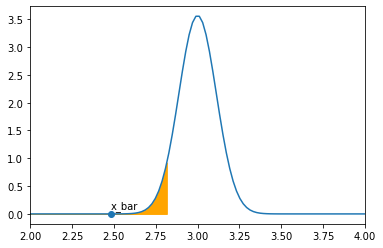

In [59]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 2.0
x_max = 4.0


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / (sam_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
z_critical_left = pop_mean + (-z_critical * std)


# Shading the right rejection region
x1 = np.linspace( x_min,z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sam_mean1, 0)
plt.annotate("x_bar", (sam_mean1, 0.1))

In [60]:
#Conclusion using Z-test
if(Z_score < -z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [61]:
#COnclusion using P-test
p_value = 1.0 - norm.cdf(np.abs(Z_score))
print("p_value = ", p_value)
if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  1.6514752962937251e-06
Reject Null Hypothesis


# One hot coding specialization

In [54]:
#Specifying values for specialization
spec_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

['CS' 'EC' 'ME' 'EL' 'CE' 'other']


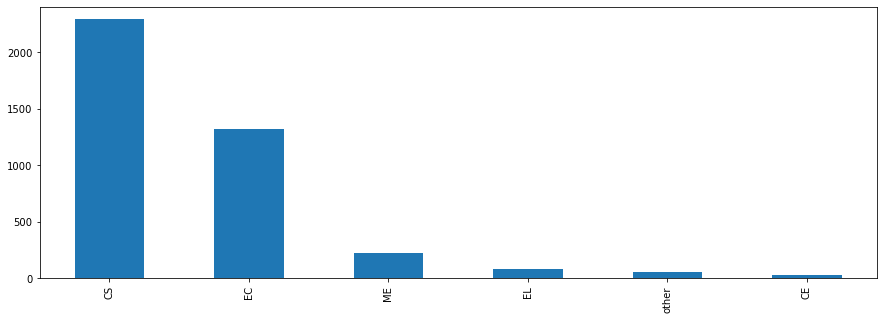

In [55]:
df['Specialization'] = df['Specialization'].map(spec_map)
df['Specialization'].value_counts().plot(kind='bar', figsize=(15,5))
print(df['Specialization'].unique())

# CONCLUSION:
* From the info, we have a dataset of 3998 rows and 39 columns.
* The Univariate analysis gives a wide view about individual numerical as well as categorical variable.
* The Bivariate analysis gives a clear view about the relationship of various numerical with categorical variable.
* From the Chi squared test, it is observed that the preference of specialization depends on gender.
* The rejection area lies on the right region.
* From the hypothesis testing, it is clear that we can earn 2.5 to 3 lakhs as a fresher
* The salary is same for both the gender candidates.
* More number of male candidates likely to make the employment possible, according to this dataset.
* From the one hot coding specialization, we can conclude that CS department students more likely to make the job offer.